<a href="https://colab.research.google.com/github/dosthzyno/Crawling/blob/main/BeautifulSoup.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install bs4

- HTML 정보로부터 원하는 데이터를 가져오기 쉽게 비슷한 분류의 데이터 별로 나누어주는(parsing) 파이썬 라이브러리
- 보통 html정보를 가져오는 urllib.request.urlopen() 모듈과 함께 사용됨

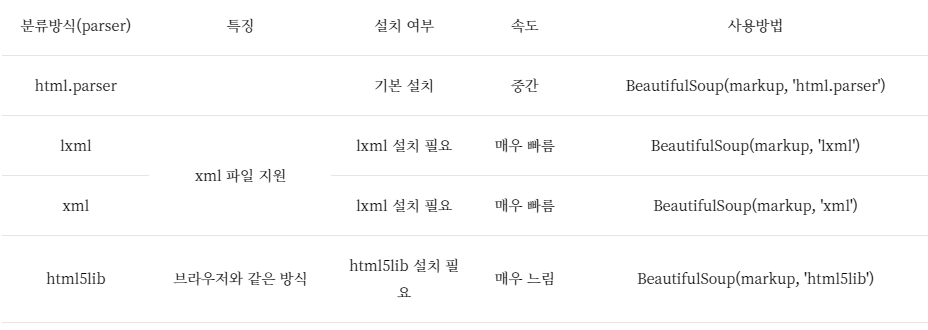


## **원하는 HTML 태그 찾아서 불러오기**
- 조건에 맞는 태그가 1개 이상이면, 첫번째 태그 가져옴


In [ ]:
from bs4 import BeautifulSoup
import requests

webpage = requests.get("https://www.daangn.com/hot_articles")
soup = BeautifulSoup(webpage.content, 'html.parser')

print(soup)

# 코드를 실행하면 네이버에 '정진호'라고 친 검색 확면의 HTML 문서 전체를 긁어서 출력해줌

- requests.get 으로 웹페이지를 요청
- 받아낸 문서를 .content로 지정한 후 BeautifulSoup를 통해 soup라는 객체로 저장
- 'html.parser' 사용


## **태그(tag) 탐색하기**
- HTML문서를 보면 < > 기호를 활용하여 다양한 태그를 사용
- 여기서는 p 태그만 찾아서 출력


In [ ]:
print(soup.p)
# 첫번째 p태그를 찾아줌

<p>당근마켓 앱에서 따뜻한 거래를 직접 경험해보세요!</p>


In [ ]:
print(soup.p.string)
#태그 속성들은 빼고 그 안에 있는 텍스트만 가져오고 싶을때 이렇게 사용

당근마켓 앱에서 따뜻한 거래를 직접 경험해보세요!


In [ ]:
print(soup.h1)
#h1 태그도 출력

<h1 id="fixed-bar-logo-title">
<a href="https://www.daangn.com/">
<span class="sr-only">당근마켓</span>
<img alt="당근마켓" class="fixed-logo" src="https://d1unjqcospf8gs.cloudfront.net/assets/home/base/header/logo-basic-24b18257ac4ef693c02233bf21e9cb7ecbf43ebd8d5b40c24d99e14094a44c81.svg"/>
</a> </h1>


In [ ]:
for child in soup.ul.children:
  print(child)

- 태그는 보통 트리구조로 위계가 있기 때문에 하위 항목을 모두 뽑고 싶으면 .children을 사용

In [ ]:
for parents in soup.ul.parents:
  print(parents)

- 지정된 태그의 상위항목은 .parents를 사용
- ul 상위에 있는 body 태그를 출력한 후, 전체 html까지 추가로 출력
- 계속 상위로 타고 올라가는 것이라 생각하면 됨

In [ ]:
for d in soup.div.children:
    print(d)

- div 태그 하위에 있는 요소들을 하나씩 출력

## **웹사이트 구조 분석**
- 위 같이 태그만으로 텍스트를 뽑아서 웹사이트 구조를 확인하는 것은 매우 피곤한 일
- 그래서 개발자 도구를 사용하는 것이 좋음
- 크롬에서 F12키를 누르면 HTML 문서에서 해당하는 부분을 보여줌
- 이걸 통해 웹사이트에 포함된 태그들을 확인하면 됨

## **find_all을 통해 원하는 부분 가져오기**
- 이번엔 원하는 부분을 모두 가져올 수 있는 /find_all()을 보자


In [ ]:
print(soup.find_all('h2'))

# 결과 값을 리스트로 돌려줌

[<h2 class="card-title">전자레인지+선반+빨래바구니</h2>, <h2 class="card-title">스토케 트립트랩 내츄럴 팝니다</h2>, <h2 class="card-title">동원참치캔 135g,100g 판매합니다ㆍ</h2>, <h2 class="card-title">스틸 선반 책장 (4단)</h2>, <h2 class="card-title">스팸,리챔,종가집김치</h2>, <h2 class="card-title">55인치 LED TV</h2>, <h2 class="card-title">의자입니다</h2>, <h2 class="card-title">철제선반</h2>, <h2 class="card-title">선반 분리가능합니다</h2>, <h2 class="card-title">디월트 티스텍 공구함키트박스</h2>, <h2 class="card-title">풍년압력솥 10인용</h2>, <h2 class="card-title">선반 정리함</h2>, <h2 class="card-title">위니아 제습기</h2>, <h2 class="card-title">mtv 자전거 팝니다</h2>, <h2 class="card-title">4단 철제 선반</h2>, <h2 class="card-title">요번설날선물세트인데너무많이받아서 팔아요</h2>, <h2 class="card-title">LG전자레인지 팔아요 몇번 사용 안했습니다☺️</h2>, <h2 class="card-title">세탁기 티비 침대 쇼파 전자렌지 기타등등</h2>, <h2 class="card-title">티티카카 접이식자전거</h2>, <h2 class="card-title">모니터와 서랍장 판매합니다.</h2>, <h2 class="card-title">지인짜 이쁜 키티캐리어 가져가세요</h2>, <h2 class="card-title">스타우브 베이비웍 (새상품)</h2>, <h2 class="card-title">대리석식탁.티비.야외원목테이블</h2>, <h2

- 싹 다 긁어오는 .find_all()이 유용한 이유는
- 정규식, html속성, 함수등을 사용해서 좀 더 스마트하게 내가 원하는 부분을 추출할 수 있음

In [ ]:
# 1) 정규식 활용

import re
soup.find_all(re.compile('[ou]l'))

# <ol> 이든 <ul>이든 뭐든 포함된 리스트를 긁어올 수 있음

In [ ]:
import re
soup.find_all(re.compile("h[1-9]"))

# h1부터 h9까지 헤딩만 다 긁어올 수 있음

In [ ]:
# 2) 리스트 활용
# 리스트로 원하는 태그들을 지정해서 뽑을 수 있음

soup.find_all(['h1','p'])

# h1, p 태그만 보고 싶을때

In [ ]:
# 3) html 속성 활용
# attrs 파라미터를 지정하면 됨

soup.find_all(attrs = {'class' : 'card-title'})
# introduction-detail 이라는 이름의 class만 긁어오고 싶을때 

soup.find_all(attrs={'class':'footer-list', 'id':'footer-address-list'})
# 속성을 여러개로 

[]